In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np

In [72]:
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
plotsDir = resultsDir+'plots/'
file='testing_Be_mixingM5_ds_LW5_500_SCF_375500.csv'

df = pd.read_csv(resultsDir+file, header=0)   

In [25]:
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/benzeneTests/'
plotsDir = resultsDir+'plots/'
# file='scipyAnderson_init1Sonly_init1e-3_tcOrder8_theta0.7_PCI_1e-06_SCF_1416000.csv'
# file='tc_gaugeShift0p5_tcOrder8_theta0.8_LW5_500_mixingHistory10_SCF_1485000.csv'
# file='tc_gaugeShift0p5_mindepth3_tcOrder7_theta0.8_LW5_500_mixingHistory6_SCF_1485000.csv'

file='scipyAnderson_initAtomic_eigensolveTol_take2_3e-5_PCI_3e-07_SCF_2067000.csv'

df = pd.read_csv(resultsDir+file, header=0) 



In [73]:
df;

In [3]:
def plotSCFconvergence(df, system = 'H2'):
    
    if system == 'H2':
        dftfeTotalEnergy = -1.1376691191341821e+00
        dftfeExchangeEnergy = -5.5876966592456134e-01
        dftfeCorrelationEnergy = -9.4268448521496129e-02
        dftfeBandEnergy = -7.5499497178953057e-01
    
    if system == "Lithium":
        dftfeTotalEnergy = -7.3340536782581447
        dftfeExchangeEnergy = -1.4916149721121696
        dftfeCorrelationEnergy = -1.5971669832262905e-01
        dftfeBandEnergy = -3.8616389456972078

    if system == "Beryllium":
        dftfeTotalEnergy = -1.4446182766680081e+01
        dftfeExchangeEnergy = -2.2902495359115198e+00
        dftfeCorrelationEnergy = -2.2341044592808737e-01
        dftfeBandEnergy = -8.1239182420318166e+00
        dftfeHartreeEnergy = 7.115165052

    if system == "Oxygen":
#         dftfeTotalEnergy = -7.4469012607372008e+01
#         dftfeExchangeEnergy = -7.2193424444124350e+00
#         dftfeCorrelationEnergy = -5.4455323198374961e-01
#         dftfeBandEnergy = -4.0613156367497737e+01
#         dftfeKineticEnergy = 7.4112265375596365e+01
#         dftfeElectrostaticEnergy = -1.4081739574277032e+02

        # Final converged values
        dftfeTotalEnergy = -7.4469337501098821e+01
        dftfeExchangeEnergy = -7.2193700828939980e+00
        dftfeCorrelationEnergy = -5.4455323568788838e-01
        dftfeBandEnergy = -4.0613397710076626e+01
        dftfeKineticEnergy =  7.4112730191157425e+01
        dftfeElectrostaticEnergy = -1.4081814437367436e+02
        dftfeHartreeEnergy = 36.32506036
        
    if system == "carbonMonoxide":
#         # these taken from mesh size 0.125 run
#         dftfeTotalEnergy = -1.1247167888813128e+02
#         dftfeExchangeEnergy = -1.1997052574614749e+01
#         dftfeCorrelationEnergy = -9.4214501809750550e-01
#         dftfeBandEnergy = -6.2898649220361037e+01
        
        dftfeBandEnergy = -6.2898682441673358e+01 # Band energy 
        dftfeKineticEnergy = 1.1185061770418731e+02 # Kinetic energy 
        dftfeExchangeEnergy = -1.1997011069615391e+01 # Exchange energy 
        dftfeCorrelationEnergy = -9.4214407530225852e-01 # Correlation Energy 
        dftfeElectrostaticEnergy = -2.1138290579726365e+02 # Electrostatic Energy
        dftfeTotalEnergy = -1.1247144323799400e+02 # Total Energy 
        
        dftfeHartreeEnergy=76.1983318
        nAtoms=2
        
    if system == "Benzene":
        
        
#         dftfeBandEnergy = -1.3426386757791246e+02 # Band energy 
#         dftfeExchangeEnergy = -2.9942603449328043e+01 # Exchange energy 
#         dftfeCorrelationEnergy = -2.6706730815123834e+00 # Correlation Energy 
#         dftfeElectrostaticEnergy = -2.1138290579726365e+02 # Electrostatic Energy

        ### SOME OF THESE VALUES COMING FROM BIKASH'S NWChem RUN
        dftfeBandEnergy = -130.8981224  
        dftfeKineticEnergy = 0 # Kinetic energy 
        dftfeExchangeEnergy = 0 # Exchange energy 
        dftfeCorrelationEnergy = 0 # Correlation Energy 
        dftfeElectrostaticEnergy = 0 # Electrostatic Energy
        dftfeHartreeEnergy = 312.915135214420
        dftfeTotalEnergy = -230.188349460044 # Total Energy 
        
        referenceEC = -32.481116554051
        
        nAtoms=12


    df['bandEnergyError']=abs(df['bandEnergy']-dftfeBandEnergy)
#     df['kineticEnergyError']=abs(df['kineticEnergy']-dftfeKineticEnergy)
#     df['electrostaticEnergyError']=abs(df['electrostaticEnergy']-dftfeElectrostaticEnergy)
    df['hartreeEnergyError']=abs(df['hartreeEnergy']-dftfeHartreeEnergy)
    df['exchangeEnergyError']=abs(df['exchangeEnergy']-dftfeExchangeEnergy)
    df['correlationEnergyError']=abs(df['correlationEnergy']-dftfeCorrelationEnergy)
    df['totalEnergyError']=abs(df['totalEnergy']-dftfeTotalEnergy)
    df['totalEnergyErrorPerAtom']=abs(df['totalEnergy']-dftfeTotalEnergy)/nAtoms
    df['bandEnergyErrorPerAtom']=abs(df['bandEnergy']-dftfeBandEnergy)/nAtoms
    df['hartreeEnergyErrorPerAtom']=abs(df['hartreeEnergy']-dftfeHartreeEnergy)/nAtoms
    df['XCEnergyErrorPerAtom']=abs(df['exchangeEnergy']+df['correlationEnergy']-referenceEC)/nAtoms

#     print("band energy errors:")
#     print(df['bandEnergyError'])
#     print("exchange energy errors:")
#     print(df['exchangeEnergyError'])
#     print("correlation energy errors:")
#     print(df['correlationEnergyError'])
#     print("total energy errors: \n")
#     print(df['totalEnergyErrorPerAtom'])
    

    
# Combined error plot
    f1, ax1 = plt.subplots(1, 1, figsize=(10,6))
    f2, ax2 = plt.subplots(1, 1, figsize=(10,6))
    
#     df.plot(x='Iteration', y='bandEnergyError', logy=True,ax=ax2, style='o')
# #     df.plot(x='Iteration', y='kineticEnergyError', logy=True,ax=ax2, style='o-')
# #     df.plot(x='Iteration', y='electrostaticEnergyError', logy=True,ax=ax2, style='o')
#     df.plot(x='Iteration', y='hartreeEnergyError', logy=True,ax=ax2, style='o')
#     df.plot(x='Iteration', y='exchangeEnergyError', logy=True,ax=ax2, style='o')
#     df.plot(x='Iteration', y='correlationEnergyError',logy=True, ax=ax2, style='o')
# #     df.plot(x='Iteration', y='totalEnergyErrorPerAtom',logy=True, ax=ax2, style='o')
#     df.plot(x='Iteration', y='totalEnergyError',logy=True, ax=ax2, style='o')
    
    df.plot(x='Iteration', y='totalEnergyErrorPerAtom',logy=True, ax=ax2, style='o')
    df.plot(x='Iteration', y='bandEnergyErrorPerAtom',logy=True, ax=ax2, style='o')
    df.plot(x='Iteration', y='hartreeEnergyErrorPerAtom',logy=True, ax=ax2, style='o')
    df.plot(x='Iteration', y='XCEnergyErrorPerAtom',logy=True, ax=ax2, style='o')

    df.plot(x='Iteration', y='densityResidual', logy=True,ax=ax1, style='o')

    
    ax2.legend(loc='lower left')
##    df.plot(x='Iteration', y='bandEnergyError', logy=True,ax=ax2, style='bo')
##    df.plot(x='Iteration', y='exchangeEnergyError', logy=True,ax=ax2, style='go')
##    df.plot(x='Iteration', y='correlationEnergyError',logy=True, ax=ax2, style='mo')
##    df.plot(x='Iteration', y='totalEnergyError',logy=True, ax=ax2, style='ro')
#     ax0.set_title(system + ': Energy Values During Green Iterations -- Good Initial Guess')
#     ax0.set_title(system + ': Energy Values During Green Iterations -- Bad Initial Guess')
    ax2.set_title(system + ': Energy Errors After Each SCF')
    ax2.set_ylabel('Energy (H)')
    ax2.set_xlabel('SCF Number')
#     plt.savefig(plotsDir+system+'Errors_combined'+'.pdf', bbox_inches='tight',format='pdf')
    
#     ax1.set_title('Oxygen Atom: Density Residual Norm')
    ax1.set_title(system + ': Density Residual Norm')
    ax1.set_ylabel('Density Residual Norm')

    ax1.grid()
    ax2.grid()
#     plt.ylim([5e-7,2e-2])


#     plt.figure()
#     for i in range(1,10):
#         plt.plot(abs( df['totalEnergy'][i]-df['totalEnergy'][i-1] ) )
    plt.show()

<IPython.core.display.Javascript object>


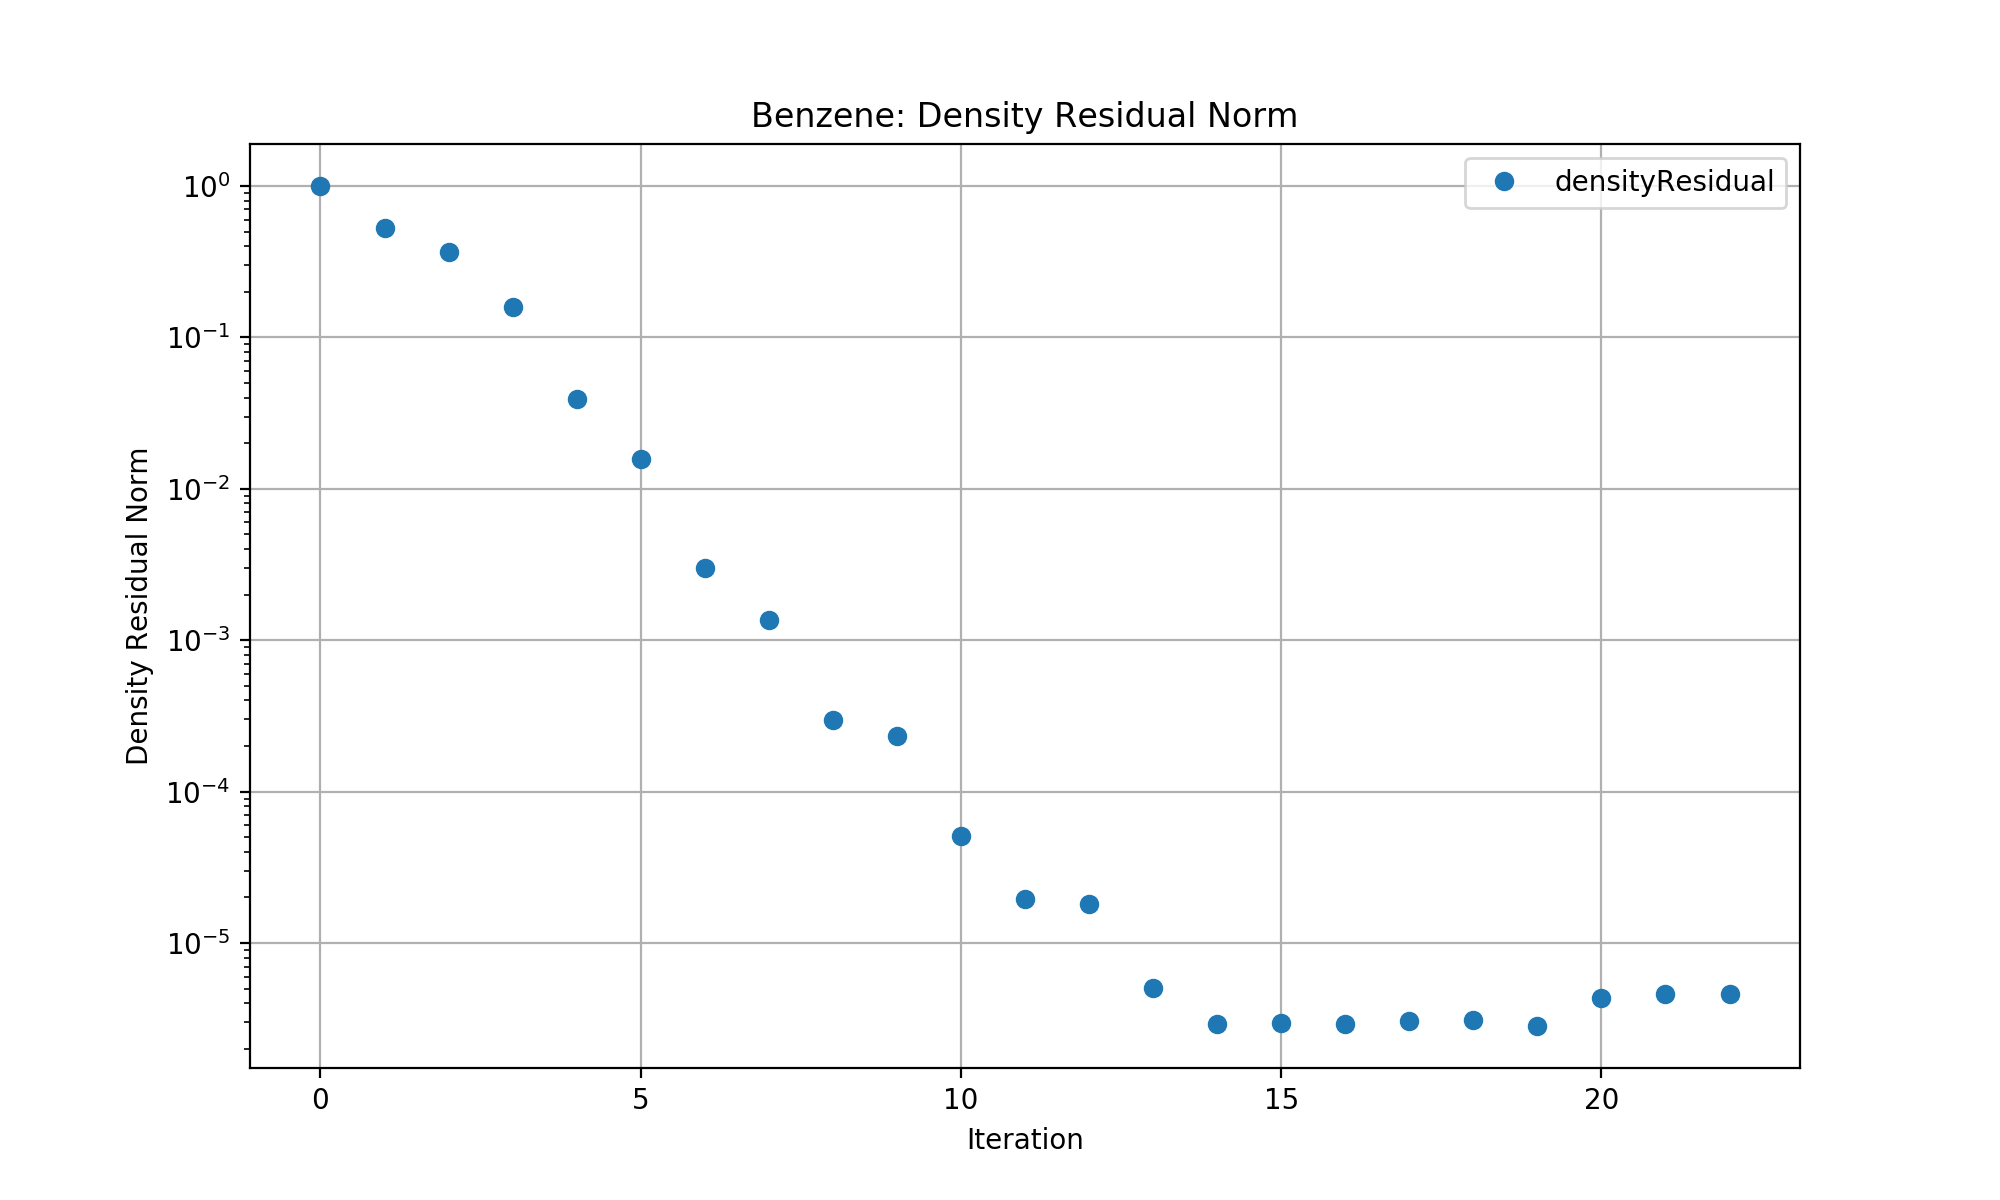

<IPython.core.display.Javascript object>


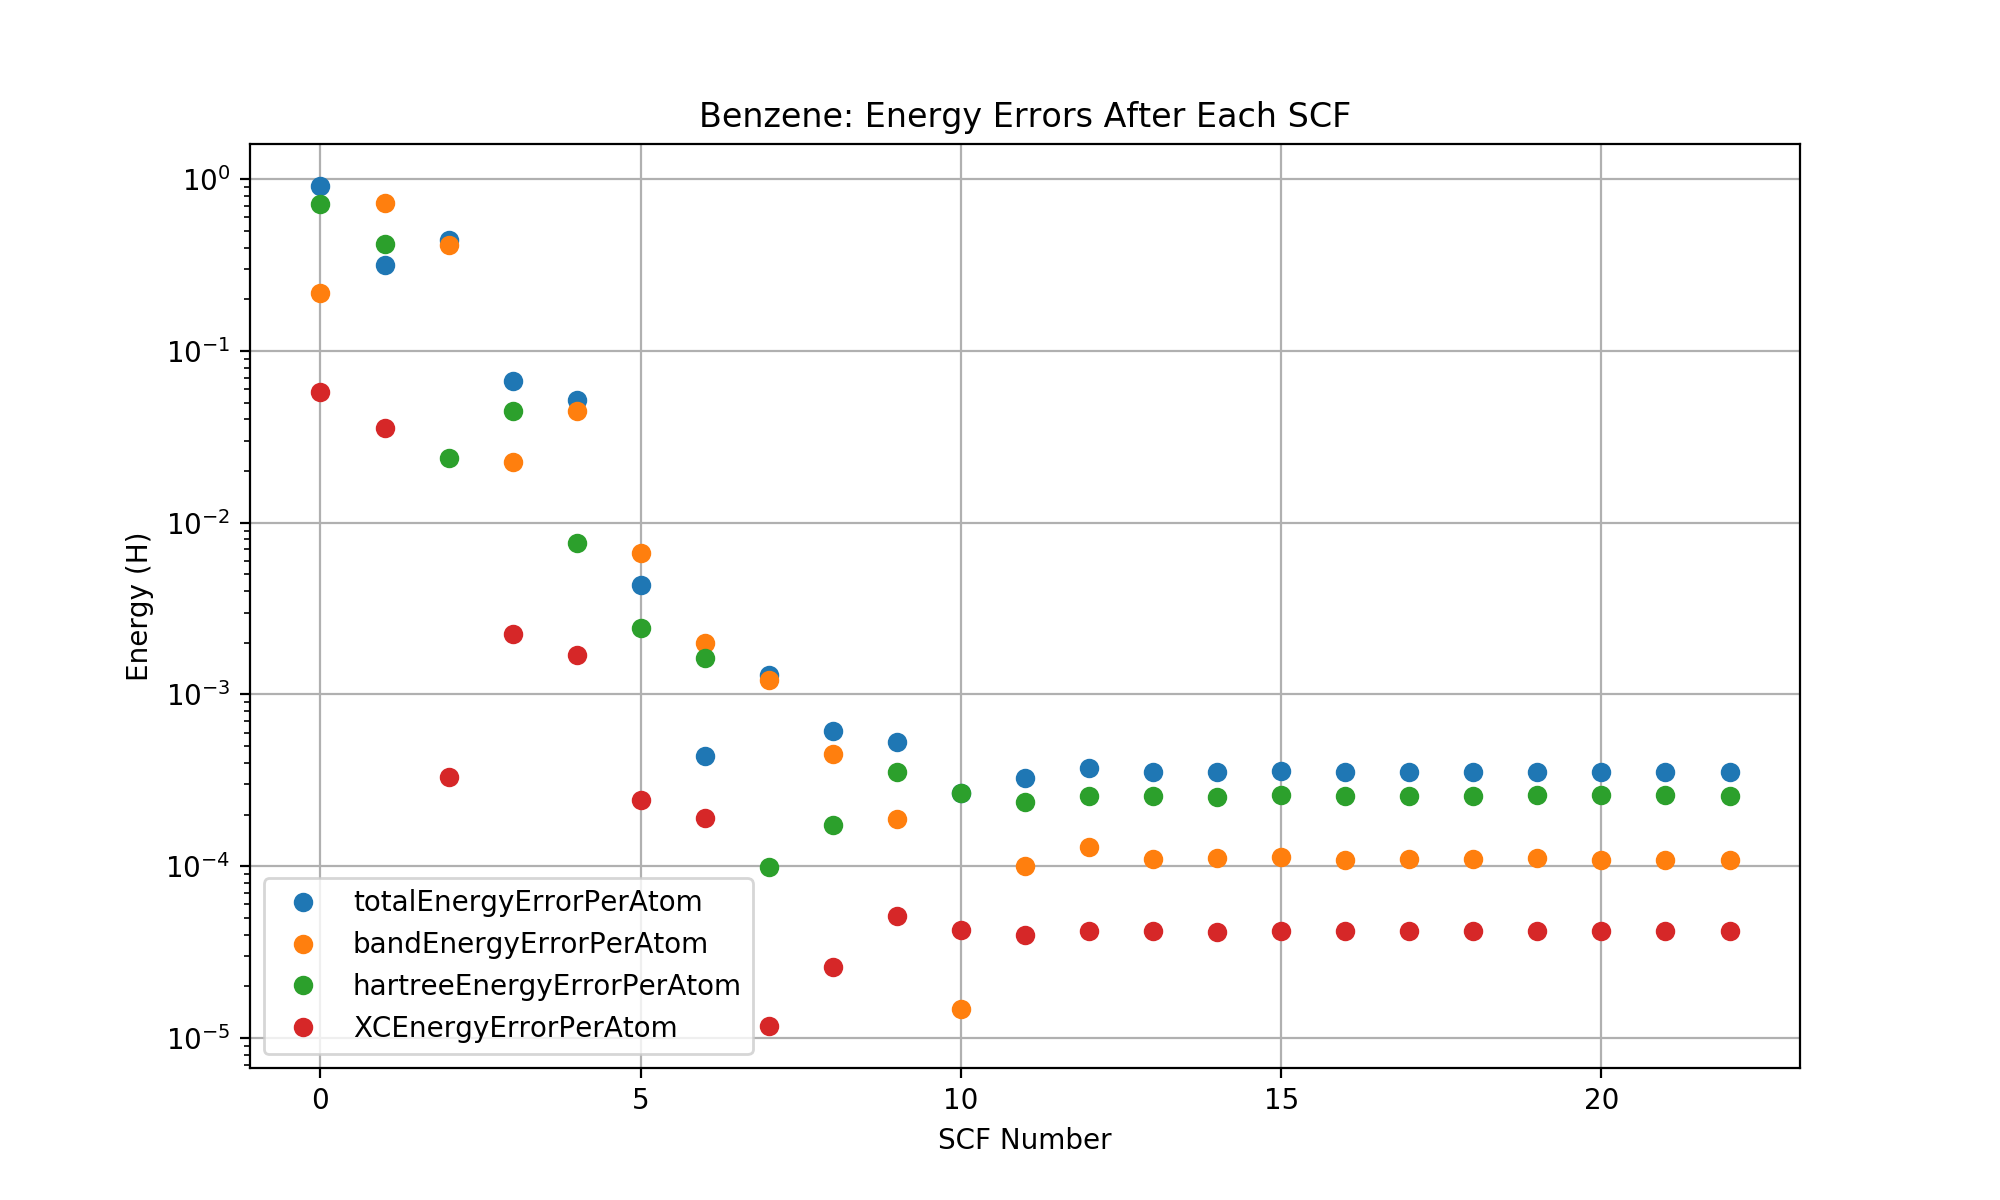

In [26]:
plotSCFconvergence(df, system="Benzene")